# Notebook to generate behavior error plot for each monkey.

This notebook requires the processed behavior data for the triangle task, saved
in `../../../cache/behavior/triangle.csv`. This can be downloaded from the OSF
repo or can be generated by running the script
`../../behavior_processing/run_cache_data.py`.

In [1]:
"""Imports."""

from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

import sys
sys.path.append('../../behavior_processing')
import load_triangle_data

# Matplotlib settings
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.dpi'] = 300

In [2]:
"""Load data."""

df = load_triangle_data.load_data()
df = df[df["on_triangle"]]

# Add response_to_objects column to triangle data
response_to_objects = []
for _, row in df.iterrows():
    response_location = row['response_location']
    if np.isnan(response_location):
        response_to_objects.append(False)
        continue
    object_locations = row[[f"object_{i}_location" for i in range(3)]].values
    object_locations = np.array([x for x in object_locations if not np.isnan(x)]).astype(int)
    response_location = int(response_location)
    object_locations = object_locations[~np.isnan(object_locations)]
    if response_location in object_locations:
        response_to_objects.append(True)
    else:
        response_to_objects.append(False)
df['response_to_objects'] = response_to_objects

# Combine dataframes
keep_columns = ["num_objects", "correct", "subject", "response_to_objects", "response_location", "target_location"]
df = df[keep_columns]
df["task"] = "triangle"

# Rename subject column to "P" and "E" instead of "Perle" and "Elgar"
df["subject"] = df["subject"].apply(lambda x: x[0])

print(df.columns)

Index(['num_objects', 'correct', 'subject', 'response_to_objects',
       'response_location', 'target_location', 'task'],
      dtype='object')


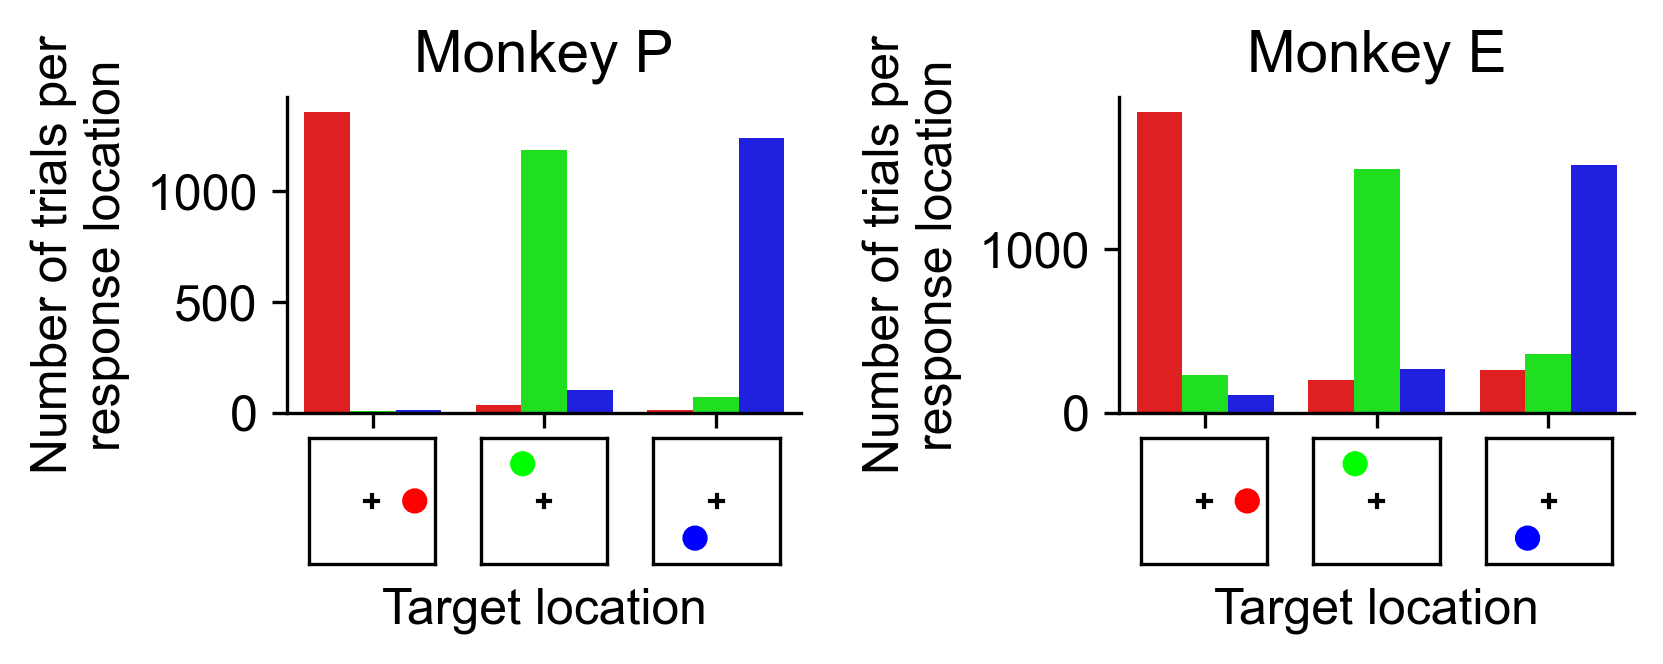

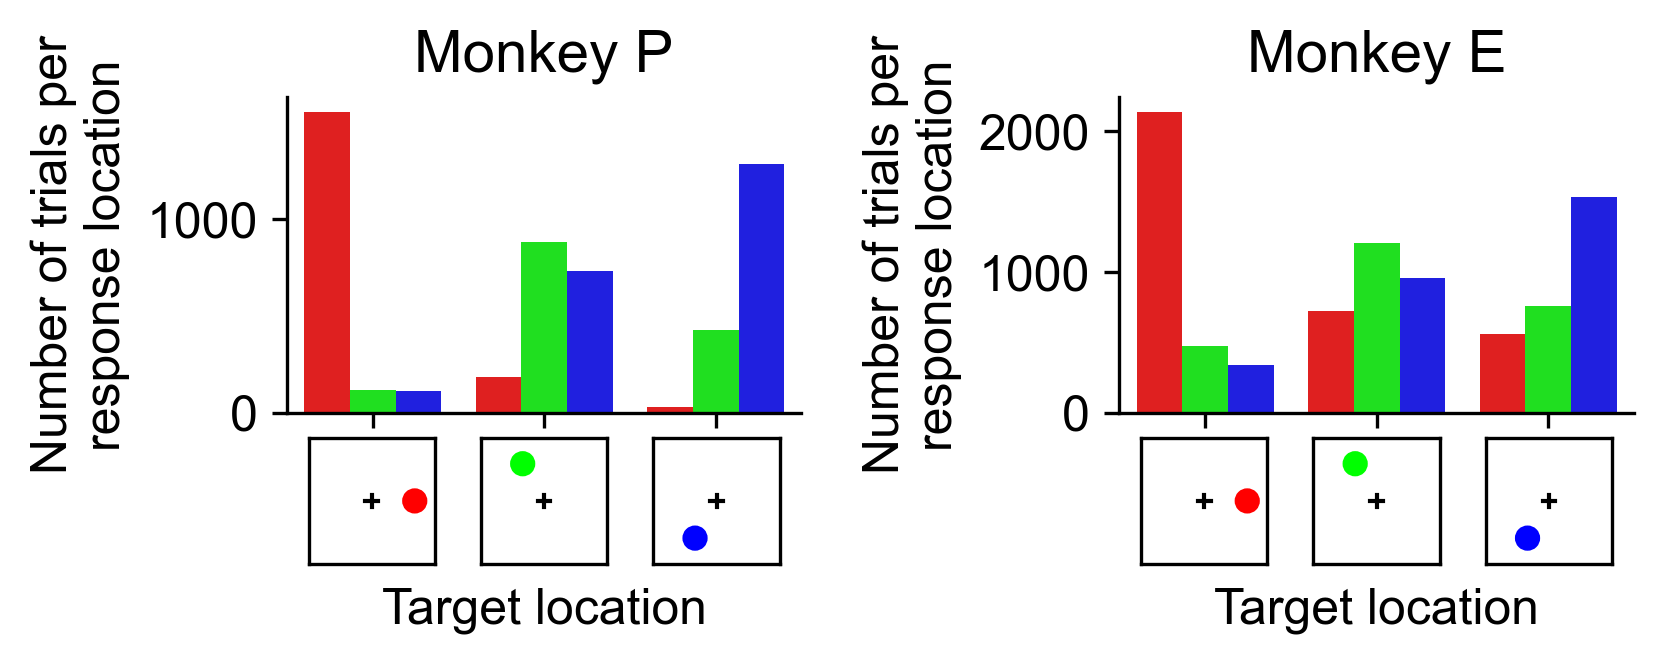

In [ ]:
"""Plot behavior error patterns per subject."""

PALETTE = {
    0: (1, 0, 0),
    1: (0, 1, 0),
    2: (0, 0, 1),
}

for num_objects in [2, 3]:
    # Average performance per number of objects per subject
    fig, axes = plt.subplots(1, 2, figsize=(5.7, 2.5), sharey=False)
    for subject, ax in zip(['P', 'E'], axes):
        sns.despine(ax=ax)
        subject_df = df[
            (df['subject'] == subject)
            & (df['num_objects'] == num_objects)
            & (df['response_to_objects'])
        ]
        sns.countplot(
            ax=ax, data=subject_df,
            x="target_location",
            hue="response_location",
            palette=PALETTE,
            legend=False,
        )
        ax.set_title(f'Monkey {subject}')
        ax.set_xlabel('Target location', labelpad=35)
        ax.set_ylabel('Number of trials per\nresponse location')
        ax.set_xticklabels([])
        
        # Make insets for target locations
        ax_targets = [
            ax.inset_axes([-0.035, -0.48, 0.4, 0.4]),
            ax.inset_axes([0.3, -0.48, 0.4, 0.4]),
            ax.inset_axes([0.635, -0.48, 0.4, 0.4]),
        ]
        for i, ax_target in enumerate(ax_targets):
            ax_target.set_xticks([])
            ax_target.set_yticks([])
            ax_target.set_aspect('equal')
            
            ax_target.set_xlim(-1, 1)
            ax_target.set_ylim(-1, 1)
            
            theta = 2 * np.pi * i / 3
            x = 0.68 * np.cos(theta)
            y = 0.68 * np.sin(theta)
            
            # Make circle for target location
            color = PALETTE[i]
            circle = plt.Circle((x, y), 0.15, color=color, fill=True, lw=1.5)
            ax_target.add_artist(circle)
            
            # Add fixation cross
            ax_target.plot([0, 0], [-0.1, 0.1], color='black', lw=1.)
            ax_target.plot([-0.1, 0.1], [0, 0], color='black', lw=1.)
        
    fig.tight_layout()

    # Save figure
    plt.savefig(f'./behavior_errors_{num_objects}.pdf', bbox_inches='tight', pad_inches=0.01)

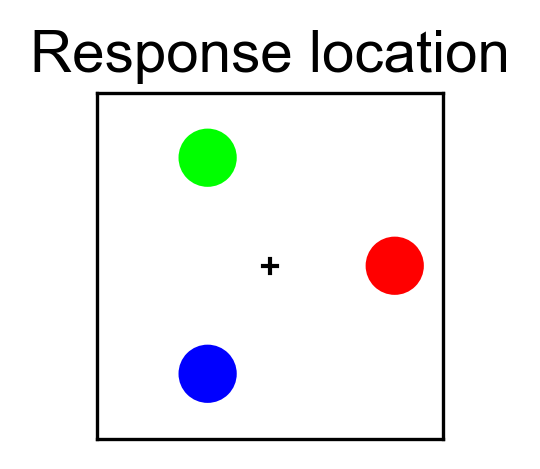

In [4]:
"""Make colorscheme."""

# Make insets for target locations
fig, ax = plt.subplots(figsize=(1.5, 1.5))

ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)


# Make circle for target location
for i in range(3):
    theta = 2 * np.pi * i / 3
    x = 0.72 * np.cos(theta)
    y = 0.72 * np.sin(theta)
    color = PALETTE[i]
    circle = plt.Circle((x, y), 0.15, color=color, fill=True, lw=1.5)
    ax.add_artist(circle)

# Add fixation cross
ax.plot([0, 0], [-0.04, 0.04], color='black', lw=1.)
ax.plot([-0.04, 0.04], [0, 0], color='black', lw=1.)

# Add title
ax.set_title('Response location', pad=5)

# Save figure
plt.savefig(f'./colorscheme.pdf', bbox_inches='tight', pad_inches=0.01)